# Домашнее задание 2. Нейронные сети
## Митрофанов Дмитрий ИУ8-83

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table style="text-align:center;">
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th style="background-color:red; color:white">C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td style="background-color:red; color:white">L</td>
            <td>6</td>
            <td>7</td>
            <td style="background-color:red; color:white">8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация библиотек

In [1]:
import copy
import math
import torch
import numpy as np
import pandas as pd
from torch import nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import preprocessing
from torch.nn import functional
from datetime import datetime, timedelta
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score

# 1. Искусственная неронная сеть для решения задачи регрессии (9 баллов)

## 1.1 Загрузите данные, поделить на train и test



In [2]:
url = "https://gitlab.toliak.ru/Toliak/oirs-datasets/-/raw/master/Real%20estate.csv"
data = pd.read_csv(url, index_col=0)
print(f"Common information\n---\nShape: {data.shape}\nSize: {data.size}\n")
data.head()

Common information
---
Shape: (414, 8)
Size: 3312



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## 1.2 По необходимости проведите преодбработку/нормализацию данных

In [3]:
def convertDate(floatDate):
	# Описание:
	# ---
	# Функция преобразования даты, представленной 
	# в виде числы с плавающей точкой, в дату,
	# представленную классом datetime.
	# 
	# Принцип преобразования:
	# Так как дата дана в формате <год>.<процент от года>, то
	# выразим процент от года в днях, таким образом в году 
	# пройдет <процент от года> * 365 / 100 дней.
	# Если прошло не целое число дней, значит будет
	# существовать процент от дня, то есть время дня, которое 
	# будет равно <процент от дня> * 86400 / 100 секунд.
	
	__year = math.floor(floatDate)
	floatDate -= __year
	__dayOfYear = floatDate * 365
	__timeOfDay = round(((__dayOfYear % 1) * 100), 2)
	__dayOfYear = math.floor(__dayOfYear)
	__strt_date = datetime(int(__year), 1, 1)
	__res_date = __strt_date + timedelta(days=(int(__dayOfYear) - 1))
	__timeOfDay *= 864	# В одном дне 86400 секунд, что является 100%, тогда 
	__hour = __timeOfDay//3600
	__minute = (__timeOfDay//60) - __hour * 60
	__second = __timeOfDay - __hour * 3600 - __minute * 60
	__res_date = __res_date.replace(hour=int(__hour), minute = int(__minute), second = int(__second))
	return pd.to_datetime(__res_date)

In [4]:
def DayTime(time):
    # Функция, выводящая время суток по европейскому образцу:
    # - 0 до 6 часов — ночь
    # - с 6 до 12 часов — утро
    # - с 12 до 18 часов — день
    # - с 18 до 24 часов — вечер
    if time in range(0,6):
        return "night"
    elif time in range(6,12):
        return "morning"
    elif time in range(12,18):
        return "day"
    else:
        return "evening"

In [5]:
# Создадим копию данных
data_transformed = copy.deepcopy(data)
# Уберём выбросы из данных
for cloumn in data_transformed.columns.values.tolist():
    data_transformed = data_transformed[
        data_transformed[cloumn].between(
            data_transformed[cloumn].quantile(.05), 
            data_transformed[cloumn].quantile(.95)
        )
    ]
# Преобразуем данные времени
data_transformed['X1 transaction date'] = data_transformed['X1 transaction date'].apply(lambda x: convertDate(x))
data_transformed['X1 transaction year'] = data_transformed['X1 transaction date'].dt.year
data_transformed['X1 transaction month'] = data_transformed['X1 transaction date'].dt.month
data_transformed['X1 transaction day'] = data_transformed['X1 transaction date'].dt.day
data_transformed['X1 transaction hour'] = data_transformed['X1 transaction date'].dt.hour
data_transformed['X1 transaction minute'] = data_transformed['X1 transaction date'].dt.minute
data_transformed['X1 transaction second'] = data_transformed['X1 transaction date'].dt.second
# Уберём столбец 'X1 transaction date' и 'No'
data_transformed = data_transformed.drop(columns=['X1 transaction date', 'No'])
# Введём новый параметр отвечающий за время суток
data_transformed['X1 transaction time'] = data_transformed['X1 transaction hour'].apply(lambda x: DayTime(x))
# Закодируем 'X1 transaction time' с помощью One-Hot кодирования
data_transformed = pd.get_dummies(data_transformed, columns=['X1 transaction time'])
# Выведем полученный результат
print(f"Common information\n---\nShape: {data_transformed.shape}\nSize: {data_transformed.size}\n")
data_transformed.head()

Common information
---
Shape: (216, 16)
Size: 3456



,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 transaction year,X1 transaction month,X1 transaction day,X1 transaction hour,X1 transaction minute,X1 transaction second,X1 transaction time_day,X1 transaction time_evening,X1 transaction time_morning,X1 transaction time_night
21,10.5,279.1726,7,24.97528,121.54541,51.6,2013,6,1,4,55,12,0,0,0,1
22,14.7,1360.1390,1,24.95204,121.54842,24.6,2012,11,29,16,55,12,1,0,0,0
23,10.1,279.1726,7,24.97528,121.54541,47.9,2013,1,30,7,4,48,0,0,1,0
25,29.3,1487.8680,2,24.97542,121.51726,27.0,2013,1,30,7,4,48,0,0,1,0
27,10.4,276.4490,5,24.95593,121.53913,33.6,2013,4,1,6,0,0,0,0,1,0


In [6]:

scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
data_scaled = copy.deepcopy(data_transformed)
data_scaled = scaler.fit_transform(data_scaled)
data_scaled = pd.DataFrame(data_scaled, columns=data_transformed.columns.values.tolist())
# Выведем полученный результат
print(f"Common information\n---\nShape: {data_scaled.shape}\nSize: {data_scaled.size}\n")
data_scaled.head()


Common information
---
Shape: (216, 16)
Size: 3456



,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,X1 transaction year,X1 transaction month,X1 transaction day,X1 transaction hour,X1 transaction minute,X1 transaction second,X1 transaction time_day,X1 transaction time_evening,X1 transaction time_morning,X1 transaction time_night
0,-0.489130,-0.840269,0.75,0.394729,0.779214,0.781711,1.0,-0.090909,-1.000000,-0.636364,1.000000,-0.5,-1.0,-1.0,-1.0,1.0
1,-0.260870,0.149989,-0.75,-0.951347,0.941303,-0.811209,-1.0,0.818182,0.866667,0.454545,1.000000,-0.5,1.0,-1.0,-1.0,-1.0
2,-0.510870,-0.840269,0.75,0.394729,0.779214,0.563422,1.0,-1.000000,0.933333,-0.363636,-0.854545,1.0,-1.0,-1.0,1.0,-1.0
3,0.532609,0.267000,-0.50,0.402838,-0.736672,-0.669617,1.0,-1.000000,0.933333,-0.363636,-0.854545,1.0,-1.0,-1.0,1.0,-1.0
4,-0.494565,-0.842764,0.25,-0.726035,0.441034,-0.280236,1.0,-0.454545,-1.000000,-0.454545,-1.000000,-1.0,-1.0,-1.0,1.0,-1.0


In [7]:
X = data_scaled.drop(columns='Y house price of unit area')
y = data_transformed['Y house price of unit area']
# Разделим данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=10
)

## 1.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=линейная регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое функцию активации можно не использовать.

Постройте: график зависимости RMSE от количества слоёв.

In [23]:
def layersGen(amount: int, activationFoo):
    __layers = []
    for layer in range(amount):
        if layer == amount - 1:
            __layers.append(nn.Linear(15, 1))
        else:
            __layers.append(nn.Linear(15, 15))
            __layers.append(activationFoo)
    return __layers

def getLoss(X_values, y_values, model):
    predict = model.forward(torch.FloatTensor(X_values))[:,0]
    loss = functional.mse_loss(predict, torch.FloatTensor(y_values))
    return loss

def train(model, optimizer, epochs):
    lossValues = []
    for _ in range(epochs):
        optimizer.zero_grad()
        model.train()

        loss = getLoss(X_train.values, y_train.values, model)

        loss.backward()
        optimizer.step()

        lossValues.append(math.sqrt(loss.item()))

        plt.yscale('log')
        plt.plot(lossValues)
    
    plt.show()

def test(model):
    loss = getLoss(X_test.values, y_test.values, model)

    print(f'loss: {math.sqrt(loss.item())}')

def trainAndTestModel(model, optimizer, maxEpochs=1000):
    train(model, optimizer, maxEpochs)
    test(model)

1 layers:


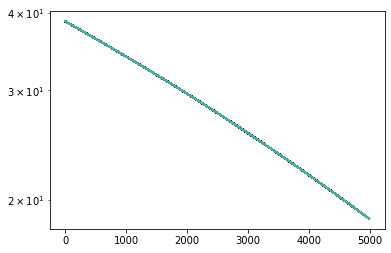

loss: 17.45381741016847


2 layers:


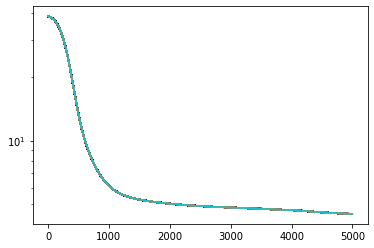

loss: 5.248791328443711


3 layers:


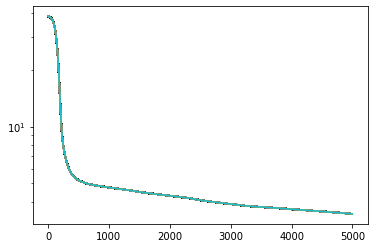

loss: 5.229587472141964


4 layers:


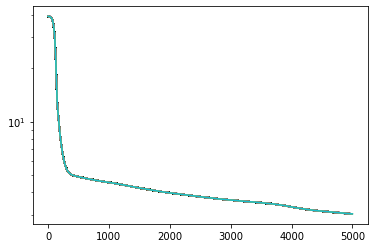

loss: 6.065371433089476




In [9]:
layers = 4
for i in range(layers):
    numLayers = i + 1
    print(f'{numLayers} layers:')
    layers = layersGen(numLayers, nn.ReLU())
    model = nn.Sequential(*layers)

    trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001), 5000)

## 1.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации: sigmoid, tanh, ReLU, ELU. 

Постройте: график зависимости RMSE от функции активации.

**Используем функцию активации sigmoid для обучения модели.**

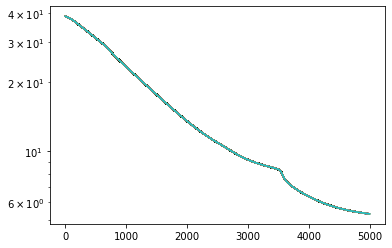

loss: 5.594195300231205


In [47]:
layers = layersGen(3, nn.Sigmoid())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001), maxEpochs=5000)

**Используем функцию активации tanh для обучения модели.**

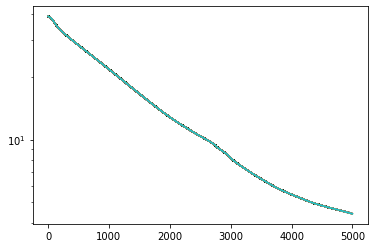

loss: 6.310533273836318


In [48]:
layers = layersGen(3, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001), maxEpochs=5000)

**Используем функцию активации ReLU для обучения модели.**

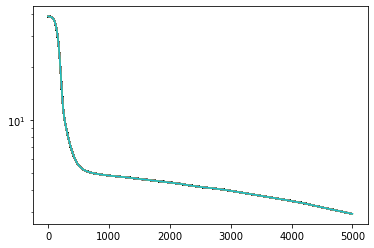

loss: 5.925163543633106


In [49]:
layers = layersGen(3, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001), maxEpochs=5000)

**Используем функцию активации ELU для обучения модели.**

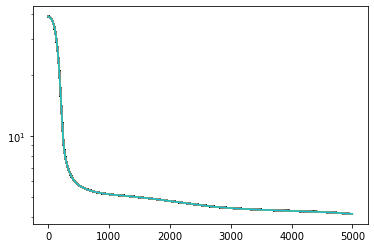

loss: 5.310545797512763


In [50]:
layers = layersGen(3, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001), maxEpochs=5000)

## 1.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: график зависимости RMSE от различных алгоритмов оптимизации.

**Используем алгоритм оптимизации SGD для обучения модели.**

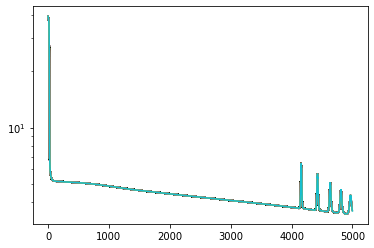

loss: 5.119748472055464


In [51]:
layers = layersGen(3, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001), maxEpochs=5000)

**Используем алгоритм оптимизации SGD with momentum для обучения модели.**

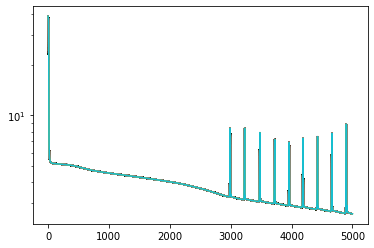

loss: 6.041722194372612


In [52]:
layers = layersGen(3, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5), maxEpochs=5000)

**Используем алгоритм оптимизации RMSprop для обучения модели.**

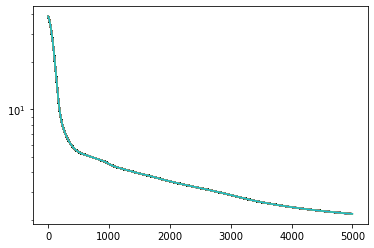

loss: 6.7512200277278005


In [53]:
layers = layersGen(3, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.RMSprop(model.parameters(), lr=0.001), maxEpochs=5000)

**Используем алгоритм оптимизации Adam для обучения модели.**

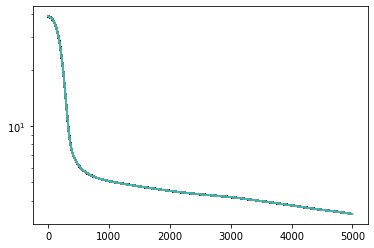

loss: 5.743115159442578


In [54]:
layers = layersGen(3, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001), maxEpochs=5000)

## 1.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: график зависимости RMSE от различных конфигураций.

In [26]:
def layersGenDBN(amount, activationFoo, batchNorm=15, dropout=0):
    layers = []
    for layer in range(amount):
        if layer == amount - 1:
            layers.append(nn.Linear(15, 1))
        else:
            layers.append(nn.Linear(15, 15))
            if batchNorm:
                layers.append(nn.BatchNorm1d(batchNorm))
            if dropout:
                layers.append(nn.Dropout(p=dropout))
            layers.append(activationFoo)
    
    return layers

**Используем batch norm для обучения модели.**

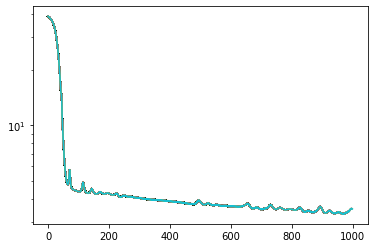

loss: 5.284261352832952


In [55]:
layers = layersGenDBN(3, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001))

**Используем dropout(0.2) для обучения модели.**

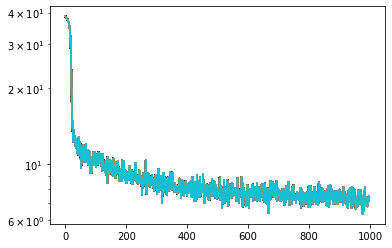

loss: 8.097429654180056


In [56]:
layers = layersGenDBN(3, nn.ELU(), batchNorm=0, dropout=0.2)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001))

**Используем dropout(0.5) для обучения модели.**

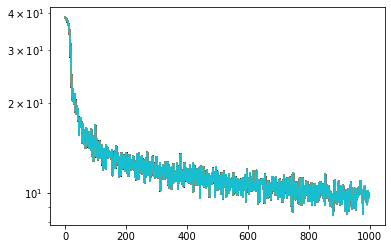

loss: 9.373198882975048


In [57]:
layers = layersGenDBN(3, nn.ELU(), batchNorm=0, dropout=0.5)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001))

**Используем batch norm + dropout(0.2) для обучения модели.**

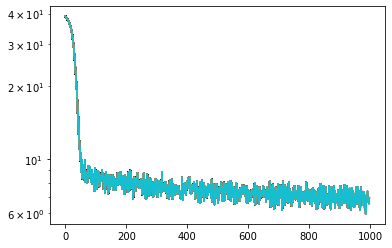

loss: 7.366689363792747


In [58]:
layers = layersGenDBN(3, nn.ELU(), dropout=0.2)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001))

**Используем batch norm + dropout(0.5) для обучения модели.**

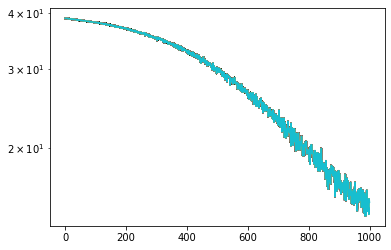

loss: 17.04577577230463


In [59]:
layers = layersGenDBN(4, nn.ReLU(), dropout=0.5)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 1.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

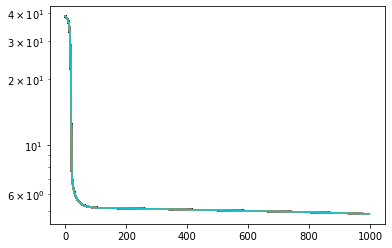

loss: 4.967602483328657


In [61]:
layers = layersGenDBN(3, nn.ELU(), batchNorm=0, dropout=0)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001))

## 1.8 Выводы

*Прекрасная жизнь начинается с ваших прекрасных мыслей:* В ходе выполенния задания были обучены модели и исследованы графики зависимости ошибки RMSE от различных параметров нейронной сети, решающей задачу регрессии. Практически и аналитически была выявлена наилучшая конфигурация нейронной сети для задачи: 3-х слойная модель с алгоритмом оптимизации SGD и функцией активацией ELU. 

# 2. Искусственная нейронная сеть для решения задачи классификации (9 баллов)

## 2.1 Загрузите данные, поделить на train и test



In [70]:
url = "./data/WA_Fn-UseC_-HR-Employee-Attrition.csv"
data = pd.read_csv(url, index_col=0)
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


## 2.2 По необходимости проведите преодбработку/нормализацию данных

Проведём необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведём данные к такому виду, чтобы их можно было использовать для обучения моделей.

In [71]:
# Для начала произведём обработку значений данных.
categorical_features = ['Education', 'JobInvolvement', 'JobLevel', 'JobRole']
encoding_features = ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'Over18'];
simple_features = ['Attrition', 'OverTime']
all_features = data.columns.values.tolist()

for feature in simple_features:
  data[feature] = data[feature].replace({'Yes': 1, 'No': 0}) 
# Если учесть, что есть всего два гендера, то ...
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0}) 
# Иначе добавить Gender в categorical_features или encoding_features.
# В данной задаче всего два.
encoder = preprocessing.LabelEncoder()
for feature in encoding_features:
  data[feature] = encoder.fit_transform(data[feature])

data = pd.get_dummies(data, columns=categorical_features)
# Теперь необходимо пронормировать данные.
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
data = pd.DataFrame(scaled, columns=data.columns)
# Теперь необходимо выделить главные компоненты.
X = data.drop(columns='Attrition')  # В таблице без 'Attrition' выделим главные компоненты.
y = data['Attrition']

pca = ExtraTreesClassifier().fit(X, y)
print(f"Число признаков:{pca.feature_importances_.size}\nВажность признаков:\n{pca.feature_importances_}")

Число признаков:52
Важность признаков:
[0.02227857 0.02783239 0.01376247 0.03222235 0.02416268 0.
 0.0270688  0.03517598 0.01894918 0.02742595 0.03139095 0.03280462
 0.0338258  0.02778192 0.02905671 0.         0.06632013 0.02676975
 0.01157464 0.02920784 0.         0.02871432 0.03311387 0.02520369
 0.03064219 0.03137453 0.02938914 0.02761185 0.0308439  0.01117591
 0.01312448 0.01596114 0.01602479 0.00452806 0.01666556 0.01388427
 0.01595452 0.00870033 0.02921056 0.0120312  0.00732905 0.00285316
 0.00148896 0.00475814 0.00573042 0.01407319 0.0037764  0.0053097
 0.00279386 0.01281822 0.01367043 0.01363343]


В качестве примера уберём все признаки, влияние которых меньше 0.01.

In [72]:
importances =  pca.feature_importances_.tolist()
idx=0
while idx < len(all_features):
  if (importances[idx] < 0.01):
    all_features.pop(idx)
    importances.pop(idx)
    idx-=1
  idx+=1

print(f"Число важных признаков: {len(all_features)}\nВажные признаки: {all_features}")

Число важных признаков: 30
Важные признаки: ['Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']


Сохраняем важные признаки.

In [73]:
data = data.filter(all_features)
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,1.0,1.0,0.715820,1.0,0.000000,0.2,0.0,0.000000,0.333333,0.0,...,0.0,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000
1,0.0,0.5,0.126700,0.5,0.250000,0.2,0.0,0.000484,0.666667,1.0,...,1.0,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667
2,1.0,1.0,0.909807,0.5,0.035714,0.8,0.0,0.001451,1.000000,1.0,...,0.0,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000
3,0.0,0.5,0.923407,0.5,0.071429,0.2,0.0,0.001935,1.000000,0.0,...,0.0,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000
4,0.0,1.0,0.350036,0.5,0.035714,0.6,0.0,0.002903,0.000000,1.0,...,0.0,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333


Разделим набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки sklearn.model_selection.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=32
)

## 2.3 Попробуйте различное количество слоёв

Обучите 4 модели, используя различное количество линейных слоёв: 1 (=логистическая регрессия), 2, 3, 4. Между двумя линейными слоями должна быть фунция активации, например, сигмоида. На последнем слое в качестве функции активации используйте сигмоиду.

Постройте: 
1) график loss для train и test в зависимости от используемого количетсва слоёв; 
2) график accuracy для train и test в зависимости от используемого количества слоёв.

In [75]:
def layersGen(amount, activationFoo):
    layers = []
    for layer in range(amount):
        if layer == amount - 1:
            layers.append(nn.Linear(52, 2))
            layers.append(nn.LogSoftmax(dim=1))
        else:
            layers.append(nn.Linear(52, 52))
            layers.append(activationFoo)
    return layers

def getLoss(X_values, y_values, model):
    predict = model.forward(torch.FloatTensor(X_values))
    loss = functional.nll_loss(predict, torch.LongTensor(y_values))
    return predict, loss

def accuracyScore(data, predict):
    return accuracy_score(data,np.argmax(predict.detach().numpy(), axis=1))

def train(model, optimizer, epochs):
    lossValues = []
    lossValuesTest = []
    accuracyValues = []
    accuracyValuesTest = []
    for i in range(epochs):
        optimizer.zero_grad()
        model.train() 

        predict, loss = getLoss(X_train.values, y_train.values, model)
        accuracyValues.append(accuracyScore(y_train, predict))

        predictTest, lossTest = getLoss(X_test.values, y_test.values, model)
        lossValuesTest.append(lossTest.item())
        accuracyValuesTest.append(accuracyScore(y_test.values, predictTest))

        loss.backward()
        optimizer.step()

        lossValues.append(loss.item())

    plt.plot(lossValues)
    plt.plot(lossValuesTest)
    plt.yscale('log')
    plt.show()

    plt.plot(accuracyValuesTest)
    plt.yscale('log')
    plt.show()

def test(model):
    predict, loss = getLoss(X_test.values, y_test.values, model)

    predictRes = np.argmax(predict.detach().numpy(), axis=1)
    f1Score = f1_score(y_test, predictRes, average='macro')
    
    print(classification_report(y_test, predictRes, zero_division=0))
    print(f'f1_score: {f1Score}')
    print(f'loss: {loss.item()}')

def trainAndTestModel(model, optimizer, maxEpochs=1000):
    train(model, optimizer, maxEpochs)
    test(model)

**1 cлой**

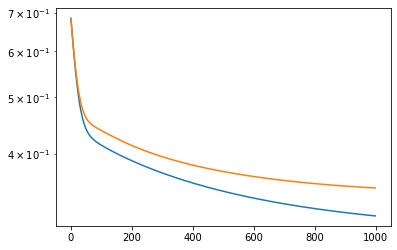

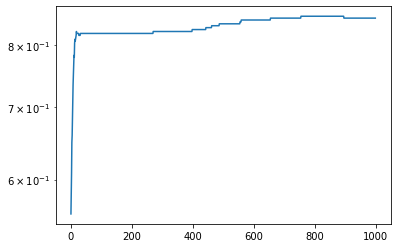

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.91       241
         1.0       0.90      0.17      0.29        53

    accuracy                           0.85       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.85      0.85      0.80       294

f1_score: 0.6000000000000001
loss: 0.3488059937953949


In [76]:
layers = layersGen(1, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

**2 cлоя**

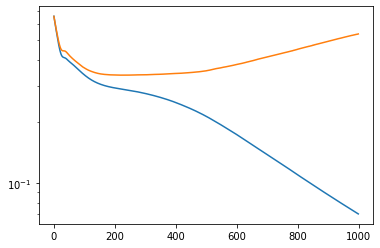

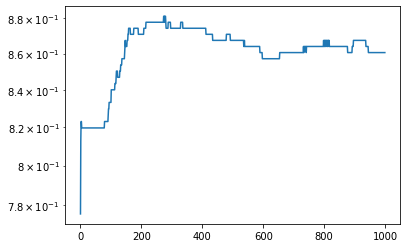

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92       241
         1.0       0.65      0.49      0.56        53

    accuracy                           0.86       294
   macro avg       0.77      0.72      0.74       294
weighted avg       0.85      0.86      0.85       294

f1_score: 0.7381557510589769
loss: 0.5384995341300964


In [77]:
layers = layersGen(2, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

**3 cлоя**

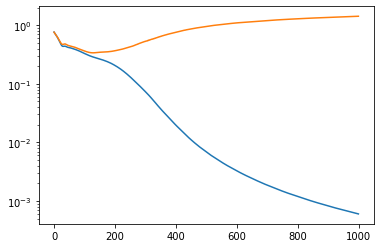

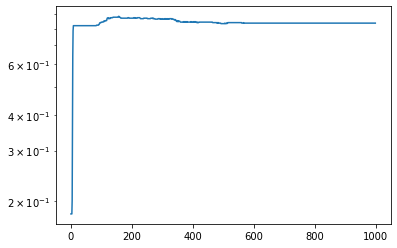

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90       241
         1.0       0.57      0.40      0.47        53

    accuracy                           0.84       294
   macro avg       0.72      0.66      0.69       294
weighted avg       0.82      0.84      0.82       294

f1_score: 0.685140562248996
loss: 1.422849416732788


In [78]:
layers = layersGen(3, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

**4 cлоя**

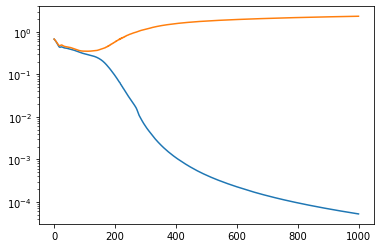

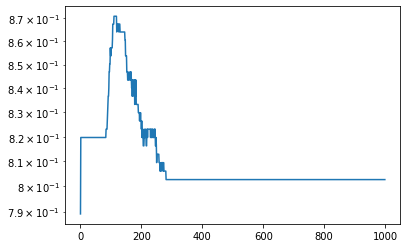

              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       241
         1.0       0.44      0.32      0.37        53

    accuracy                           0.80       294
   macro avg       0.65      0.61      0.63       294
weighted avg       0.78      0.80      0.79       294

f1_score: 0.6263148667601682
loss: 2.3497397899627686


In [79]:
layers = layersGen(4, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 2.4 Попробуйте различные функции активации

Обучите 4 модели, используя 4 различных функции активации на промежуточных слоях: sigmoid, tanh, ReLU, ELU. На выходном слое в качестве функции активации используйте сигмоиду.

Постройте: 1) график loss для train и test в зависимости от используемой функции активации; 2) график accuracy для train и test в зависимости от используемой функции активации;

**Используем функцию активации sigmoid для обучения модели.**

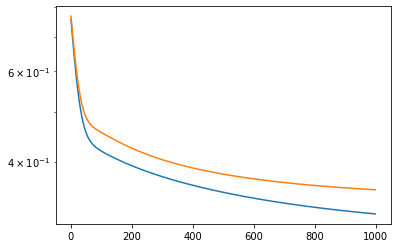

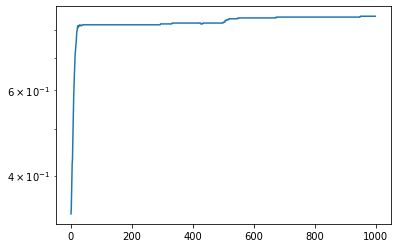

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       241
         1.0       0.92      0.21      0.34        53

    accuracy                           0.85       294
   macro avg       0.88      0.60      0.63       294
weighted avg       0.86      0.85      0.81       294

f1_score: 0.6281217826150904
loss: 0.35279712080955505


In [80]:
layers = layersGen(1, nn.Sigmoid())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

**Используем функцию активации tanh для обучения модели.**

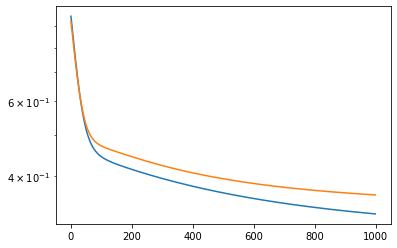

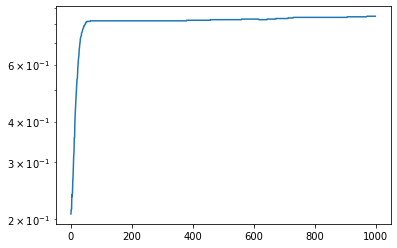

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.91       241
         1.0       0.90      0.17      0.29        53

    accuracy                           0.85       294
   macro avg       0.87      0.58      0.60       294
weighted avg       0.85      0.85      0.80       294

f1_score: 0.6000000000000001
loss: 0.36066925525665283


In [81]:
layers = layersGen(1, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

**Используем функцию активации ReLU для обучения модели.**

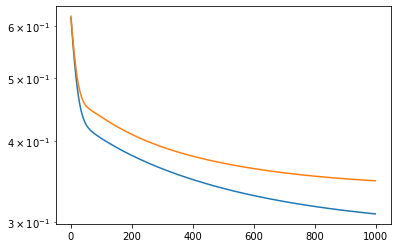

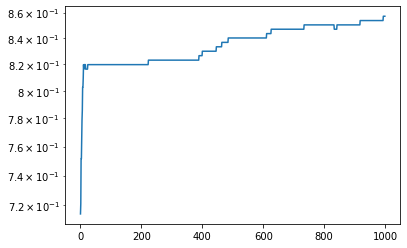

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       241
         1.0       0.92      0.23      0.36        53

    accuracy                           0.86       294
   macro avg       0.89      0.61      0.64       294
weighted avg       0.87      0.86      0.82       294

f1_score: 0.6415882967607106
loss: 0.34741073846817017


In [82]:
layers = layersGen(1, nn.ReLU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

**Используем функцию активации ELU для обучения модели.**

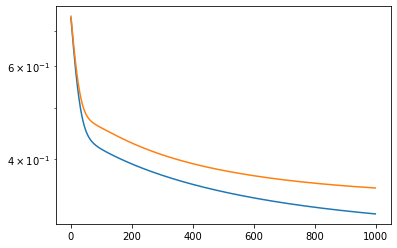

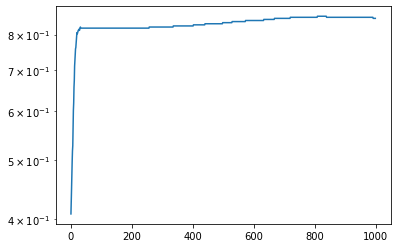

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       241
         1.0       0.85      0.21      0.33        53

    accuracy                           0.85       294
   macro avg       0.85      0.60      0.62       294
weighted avg       0.85      0.85      0.81       294

f1_score: 0.6245210727969349
loss: 0.3528267741203308


In [83]:
layers = layersGen(1, nn.ELU())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 2.5 Попробуйте различные алгоритмы оптимизации

Обучите 4 модели, используя 4 различных алгоритма оптимизации: SGD, SGD with momentum, RMSprop, Adam

Постройте: 
1) график loss для train и test в зависимости от используемого  алгоритма оптимизации; 
2) график accuracy для train и test в зависимости от используемого  алгоритма оптимизации.

**Используем алгоритм оптимизации SGD для обучения модели.**

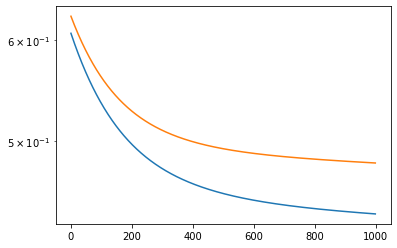

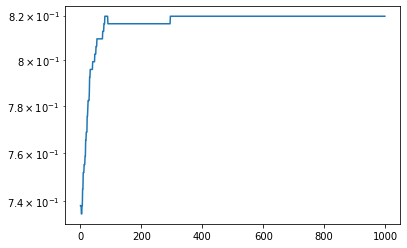

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.4808111786842346


In [84]:
layers = layersGen(1, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001))

**Используем алгоритм оптимизации SGD with momentum для обучения модели.**

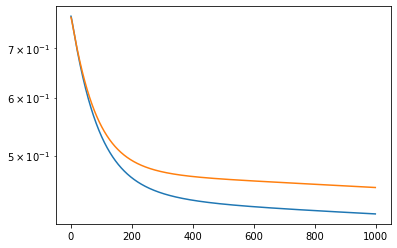

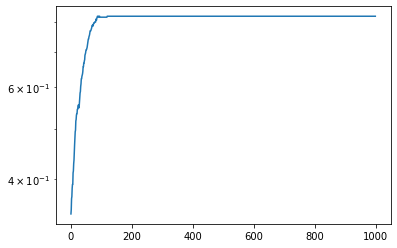

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.4526119530200958


In [85]:
layers = layersGen(1, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5))

**Используем алгоритм оптимизации RMSprop для обучения модели.**

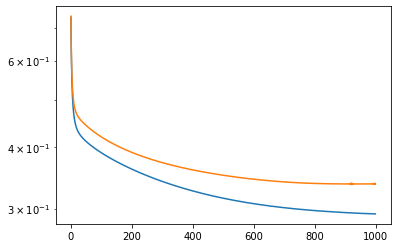

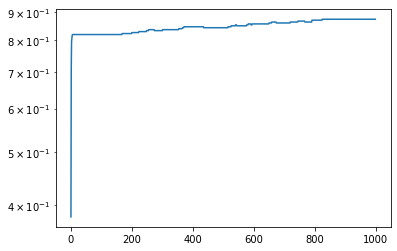

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       241
         1.0       0.81      0.40      0.53        53

    accuracy                           0.87       294
   macro avg       0.84      0.69      0.73       294
weighted avg       0.87      0.87      0.86       294

f1_score: 0.7294770087786924
loss: 0.3378765881061554


In [86]:
layers = layersGen(1, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.RMSprop(model.parameters(), lr=0.001))

**Используем алгоритм оптимизации Adam для обучения модели.**

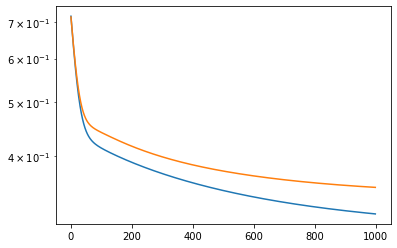

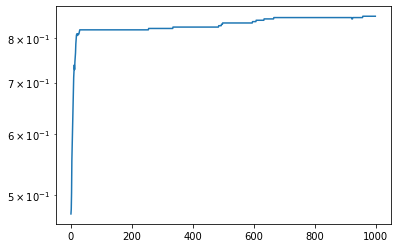

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       241
         1.0       0.92      0.21      0.34        53

    accuracy                           0.85       294
   macro avg       0.88      0.60      0.63       294
weighted avg       0.86      0.85      0.81       294

f1_score: 0.6281217826150904
loss: 0.35078325867652893


In [87]:
layers = layersGen(1, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.Adam(model.parameters(), lr=0.001))

## 2.6 Попробуйте добавить dropout и batch norm

Обучите 5 моделей, используя 5 различных конфигураций: только BatchNorm, только dropout 0.2, только dropout 0.5, BatchNorm + dropout 0.2, BatchNorm + dropout 0.5.

Постройте: 
1) график loss для train и test в зависимости от используемой конфигурации; 
2) график accuracy для train и test в зависимости от используемой конфигурации.

In [89]:
def layersGenDBN(amount, activationFoo, batchNorm = 52, dropout = 0):
    layers = []
    for layer in range(amount):
        if layer == amount - 1:
            layers.append(nn.Linear(52, 2))
            layers.append(nn.LogSoftmax(dim=1))
        else:
            layers.append(nn.Linear(52, 52))
            if batchNorm:
                layers.append(nn.BatchNorm1d(batchNorm))
            if dropout:
                layers.append(nn.Dropout(p = dropout))
            layers.append(activationFoo)
    return layers

**Используем batch norm для обучения модели.**

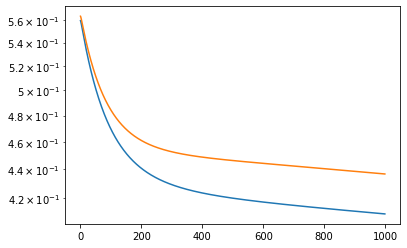

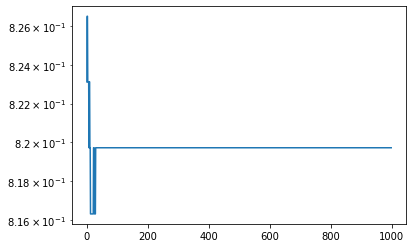

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.4367852210998535


In [90]:
layers = layersGenDBN(1, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5))

**Используем dropout(0.2) для обучения модели.**

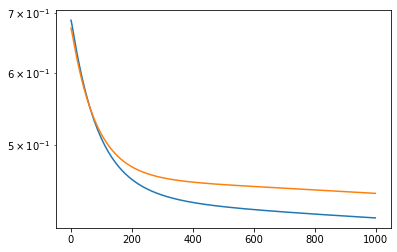

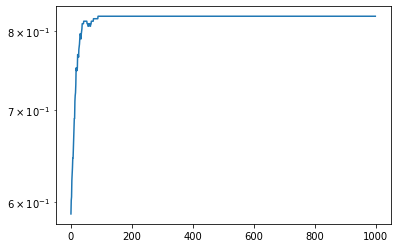

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.4414399266242981


In [91]:
layers = layersGenDBN(1, nn.Tanh(), batchNorm = 0, dropout = 0.2)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5))

**Используем dropout(0.5) для обучения модели.**

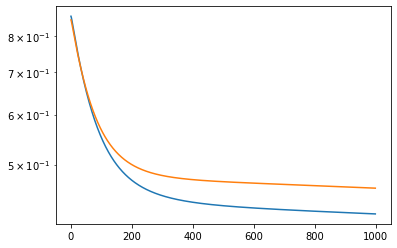

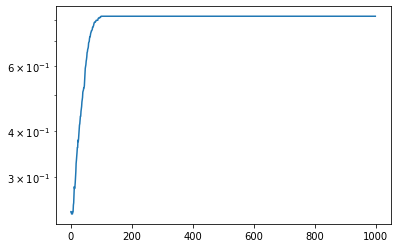

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.45854613184928894


In [92]:
layers = layersGenDBN(1, nn.Tanh(), batchNorm = 0, dropout = 0.5)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5))

**Используем batch norm + dropout(0.2) для обучения модели.**

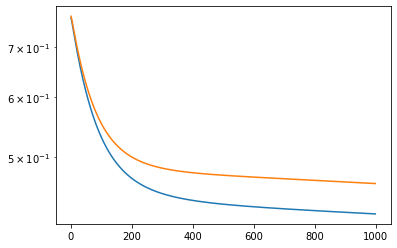

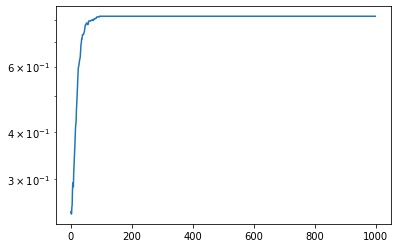

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.46060439944267273


In [93]:
layers = layersGenDBN(1, nn.Tanh(), dropout = 0.2)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5))

**Используем batch norm + dropout(0.5) для обучения модели.**

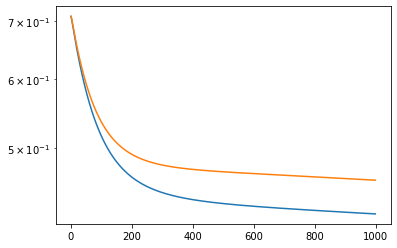

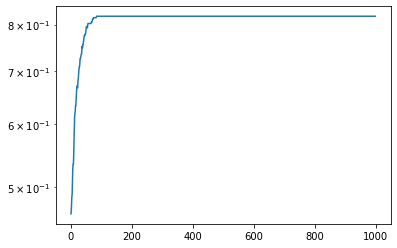

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.4594060778617859


In [94]:
layers = layersGenDBN(1, nn.Tanh(), dropout = 0.5)
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5))

## 2.7 Постройте финальную модель

Используя информацию, полученную на предыдущих этапах, предложите оптимальную конфигурацию нейронной сети для вашей задачи. Обучите модель.

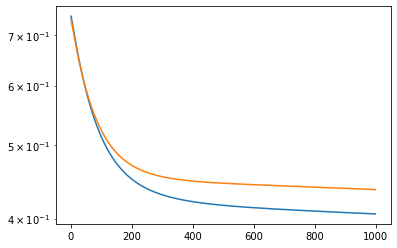

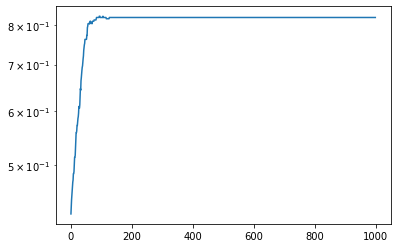

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       241
         1.0       0.00      0.00      0.00        53

    accuracy                           0.82       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.67      0.82      0.74       294

f1_score: 0.45046728971962613
loss: 0.43693190813064575


In [97]:
layers = layersGenDBN(1, nn.Tanh())
model = nn.Sequential(*layers)

trainAndTestModel(model, torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5))

## 2.8 Выводы

*Your beautiful thoughts:*  В ходе выполенния задания были обучены модели и исследованы графики зависимости loss и accuracy от различных параметров нейронной сети, решающей задачу классификации. Практически и аналитически была выявлена наилучшая конфигурация нейронной сети для задачи: 1-х слойная модель с алгоритмом оптимизации SGD with momentm (0.5), функцией активацией Tanh и batch norm. 